In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import cv2
import numpy as np

x_train = []
x_test = []
y_train = []
y_test = []

dem = 0
for imgpath in glob.glob('/content/drive/MyDrive/Colab Notebooks/Anh/Hung/*.bmp'):
  n = cv2.imread(imgpath)

  if dem%10 == 0:
    x_test.append(n)
    y_test.append(0)
  else:
    x_train.append(n)
    y_train.append(0)
  dem += 1
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)

y_test = np.array(y_test)
y_train = list(y_train)

# y_train, y_test là output (như đánh label cho ảnh x_train, x_test á)
# y_train, y_test chỉ được đánh số từ 0 cho các đối tượng (output): VD a Trực đánh số 0, a Hiếu số 1, tao số 2



In [ ]:
print(y_train)
print(y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0


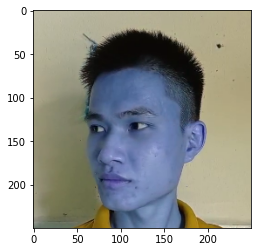

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[20])
print(y_train[20])

In [ ]:
print(x_train.shape)
#print(y_train.shape) # do ép kiểu thành list nên k xem shape đc
print(y_test.shape)
print(x_test.shape)

(140, 250, 250, 3)
(16,)
(16, 250, 250, 3)


In [ ]:
a = np.array([[1], [2], [3], [4]])
print(a)
m = np.delete(a, 2)
print(m)
a = list(a)
print(a)

[[1]
 [2]
 [3]
 [4]]
[1 2 4]
[array([1]), array([2]), array([3]), array([4])]


In [ ]:
from keras.utils.np_utils import to_categorical

x_train = x_train.reshape(140, 187500)
x_test = x_test.reshape(16, 187500)
# Chuyen don vi mau thanh so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuyen anh trang den
x_train /= 255
x_test /= 255

# ...to_categorical(y_train, 3) với 3: số phần tử output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(187500,)))  # 784: số tín hiệu đầu vào
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) # Không cần Dropout cũng đc :D?
model.add(Dense(1, activation='softmax')) 
# model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=300, verbose=1, validation_data=(x_test, y_test))  

Epoch 1/300
2/2 [==============================] - 1s 212ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/300
2/2 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/300
2/2 [==============================] - 0s 69ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/300
2/2 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/300
2/2 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/300
2/2 [==============================] - 0s 74ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/300
2/2 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_los

In [ ]:
model.save('NhanDienKhuonMat_ANN.h5')

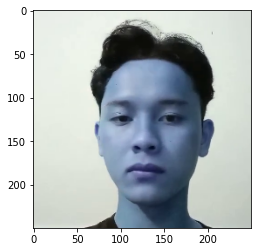

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Anh_ANN/Nhom3Nguoi/BanThinh_ 144.bmp')  
plt.imshow(img)


(250, 250, 3)


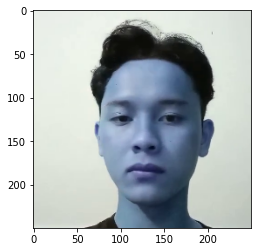

In [ ]:
img_re = cv2.resize(img, (250, 250))
plt.imshow(img_re)
print(img_re.shape)

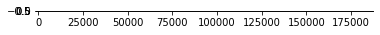

In [ ]:
x_test_c = img_re.reshape(-1, 187500) 
x_test_c = x_test_c.astype('float32')
x_test_c /= 255
plt.imshow(x_test_c)

In [ ]:
y_pred = model.predict(x_test_c)
# print(y_test)
# acc_num_class0 = y_pred[0]
# acc_num_class1 = y_pred[1]
# np.max
print(y_pred)

[[1.]]


In [ ]:
score = model.evaluate(x_test_c, y_pred, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0
Test accuracy: 1.0
